# Deploy DFG IR on FPGA

This tutorial continues, with how to, finally deploy the algorithm, in this case the simple CNN trained on the MNIST dataset, onto an FPGA. We have talked about the network itself, Tensorflow as a *DSL* and we are going to finish off by using the platform that we have introduced in previous tutorials to take this network and actually deploy it onto a FPGA.

Given that you have installed `plumber` in the Tutorial 1, we are now going to use it to generate a *D*ata-*F*low *G*raph (DFG) that can be passed down the platform to reach the final execution on FPGA and CPU. 

Just for a quick summary, the platform itself consists of multiple parts: *plumber* is a web-based application capable of taking a templated description of a machine learning algorithm, optimize it and creates a DFG that is then passed into *raintime*. *raintime* then instantiates computation nodes, either processed in a CPU or offloaded to a FPGA accelerator. *rainman* then takes the FPGA templates and synthesises them on the device itself, while interconnecting with the nodes instantiated on the CPU. All can be visualised in a simple diagram:

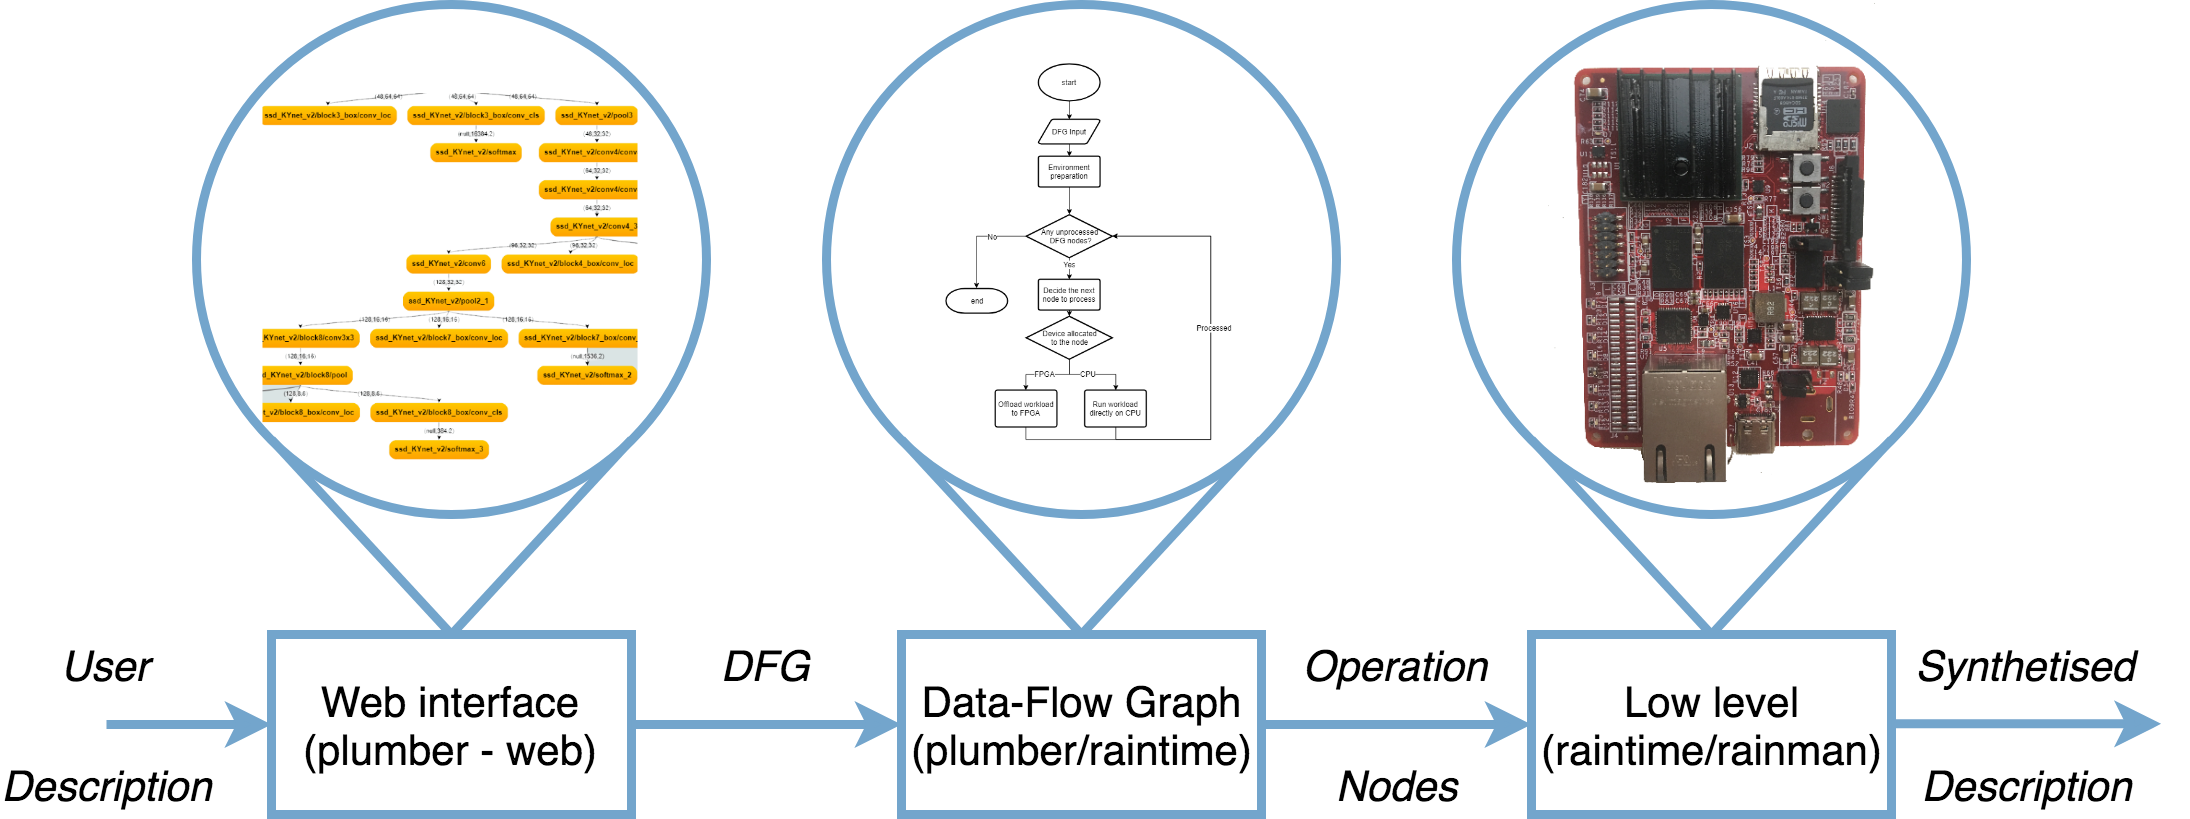

So to get started with the MNIST example, make sure that you have the checkpoint files of your model and a `plumber_cli` installed in your virtual environment. 

Then we can simply use the `plumber_cli` to step-by-step to create a DFG that can be loaded on FPGA.

#### 1. Step: Freezing a model
Make sure that your checkpoint files after training contain these files: 

`checkpoint`: a file that contains meta information about the checkpoint directory.

`*.meta`: the meta information about your model

`*.data`: trained data

`*.index`: the index file

Thse files are now going to be used to be imported into `plumber` and consequently converted into a representation that the platform *understands* and can optimise. 

`/tmp/mnist_lenet_ckpt` is the checkpoint directory

`/tmp/mnist_lenet` is the output directory

`Lenet/argmax` is the last layer, that can be provided or automatically infered from the network

#### 2. Step: Creating a DFG

Out of these files that you have created you can create a raw Data-Flow graph, again by using `plumber_cli`:

`/tmp/mnist_lenet.pb` is the plumber file

`/tmp/mnist_lenet_dfg.pb` is the plumber template for a DFG

`/tmp/mnist_lenet_dfg.pbtxt` is the description of the DFG

`/tmp/mnist_lenet_dfg.h5` is a data-file describing input/output sizes, important for random data generation or weights extraction

`1,28,28,1` is an input image shape, in our case 28x28 images with one channel with one batch, n.b.: the format is Batch Size, Height, Width, Number of Channels.

#### 4. Step: Optimizing DFG
`plumber` has the ability to compotationally optimise the DFG with respect to the hardware that the platform presents, that can result in increased accuracy and speed improvements.

You can do it simply with `plumber_cli`:

This will now take the original DFG described in `tmp/mnist_lenet_dfg.pb` and optimize it to maximaise the fain from our platform: 

`/tmp/mnist_lenet_dfg.pb` is the original plumber file

`/tmp/mnist_lenet_dfg.h5` is the data file that we have created in the previous step

`/tmp/mnist_lenet_opt_dfg.pbtxt` this is the new, optimised, pbtxt

`/tmp/logs` this is the logging directory

#### 3. Step: Importing DFG into `raintime`

Just as a quick recap: `raintime` is a software runtime library for processing CNNs on embedded FPGA systems. Computation nodes in a CNN can either be processed in CPU or offloaded to the FPGA accelerator design built by `rainman`. 


In case you want to skip these two steps you can also find the data generated at this link: [Link](https://s3.eu-west-2.amazonaws.com/raintime-test-data/mnist_data.zip)

#### 4. Step: Compiling 